Parliamentary

In [ ]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
# List of URLs containing the tables
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

def extract_table_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.find_all('table')

        all_data = []

        for table in tables:
            headers = []
            rows = []

            # Extract headers
            for th in table.find_all('th'):
                headers.append(th.text.strip())

            # Extract rows
            for tr in table.find_all('tr'):
                row = []
                for td in tr.find_all('td'):
                    row.append(td.text.strip())
                if row:
                    rows.append(row)

            # Store table data
            table_data = {
                'headers': headers,
                'rows': rows
            }

            all_data.append(table_data)

        return all_data
    else:
        print(f"Failed to fetch {url}")
        return None

# Extract table data from the URL
tables_data = extract_table_data(url)

# Print table data (for demonstration)
if tables_data:
    for i, table_data in enumerate(tables_data, 1):
        headers = table_data['headers']
        rows = table_data['rows']

        print(f"Table {i} Headers:")
        print(headers)
        print(f"Table {i} Rows:")
        for row in rows:
            print(row)
        print("-" * 50)
else:
    print("No tables found or failed to fetch.")


Table 1 Headers:
['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']
Table 1 Rows:
['Bharatiya Janata Party - BJP', '240', '0', '240']
['Indian National Congress - INC', '99', '0', '99']
['Samajwadi Party - SP', '37', '0', '37']
['All India Trinamool Congress - AITC', '29', '0', '29']
['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
['Telugu Desam - TDP', '16', '0', '16']
['Janata Dal  (United) - JD(U)', '12', '0', '12']
['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
['Shiv Sena - SHS', '7', '0', '7']
['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5']
['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4']
['Rashtriya Janata Dal - RJD', '4', '0', '4']
['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4']
['Indian Union Muslim League - IUML', '3', '0', '3']
['Aam Aadmi Party - AAAP', '3', '0', '3']
['Jharkhand Mukti Morcha - JMM', '3', '0', '3']
['Jan

<ipython-input-9-95b2ab633b7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Won', y='Party', data=party_seats, palette='Set2')


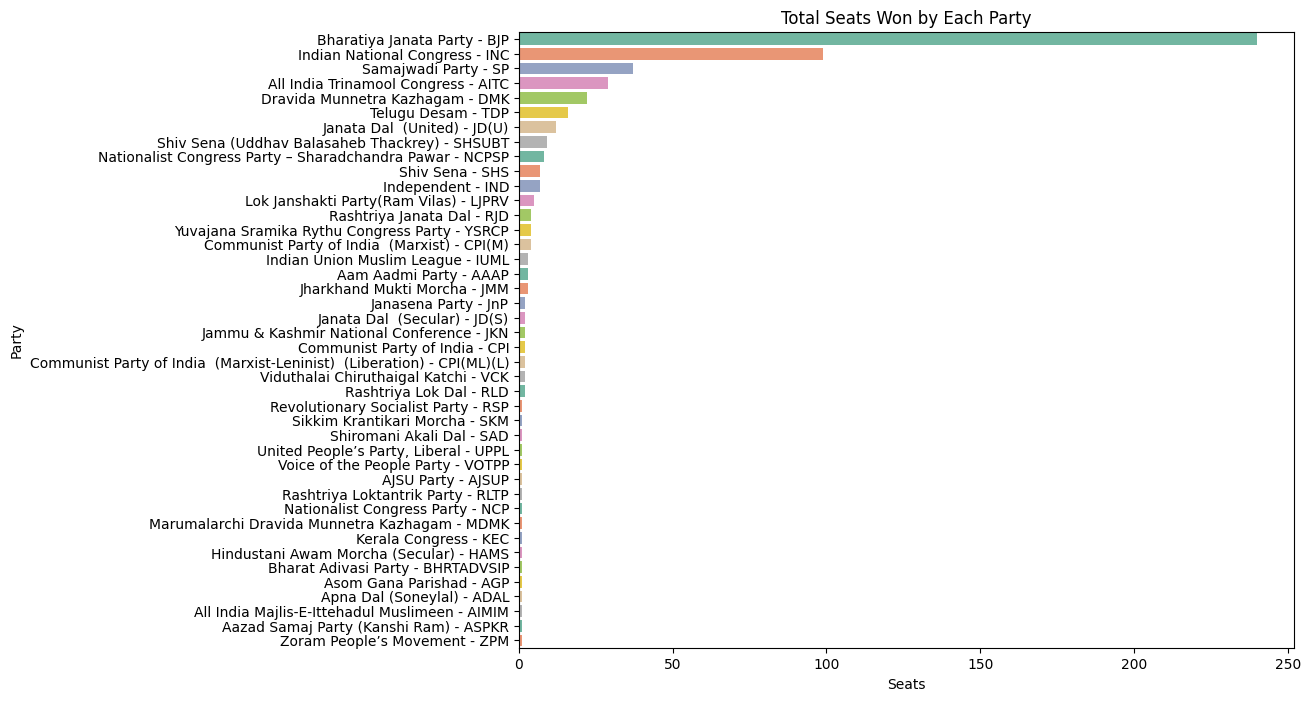

In [9]:


# Fetching the main page
link = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(link)

html = response.text
soup = BeautifulSoup(html, "html.parser")

# Extracting state options
state_options = soup.findAll("option")
state_values = {option.get("value"): option.text for option in state_options if option.get("value")}

base_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-"
results = []

# Fetching data for each state
for val, state in state_values.items():
    full_link = f"{base_url}{val}.htm"
    state_response = requests.get(full_link)
    state_html = state_response.content
    state_soup = BeautifulSoup(state_html, "html.parser")

    # Finding table rows with results
    table_rows = state_soup.findAll("tr", {"class": "tr"})
    for tr in table_rows:
        party_name_td = tr.find("td", {"style": "text-align:left"})
        if party_name_td:
            party_name = party_name_td.text.strip()
            seats_won = tr.find("a").text.strip()
            results.append([state, party_name, int(seats_won)])

# Creating a DataFrame
df = pd.DataFrame(results, columns=['State', 'Party', 'Won'])

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv(os.path.join(output_dir, 'statewise.csv'), index=False)

# Grouping by party to get total seats won
party_seats = df.groupby('Party')['Won'].sum().reset_index().sort_values(by='Won', ascending=False)

# Plotting total seats won by each party
plt.figure(figsize=(10, 8))
sns.barplot(x='Won', y='Party', data=party_seats, palette='Set2')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Seats')
plt.ylabel('Party')
plt.show()




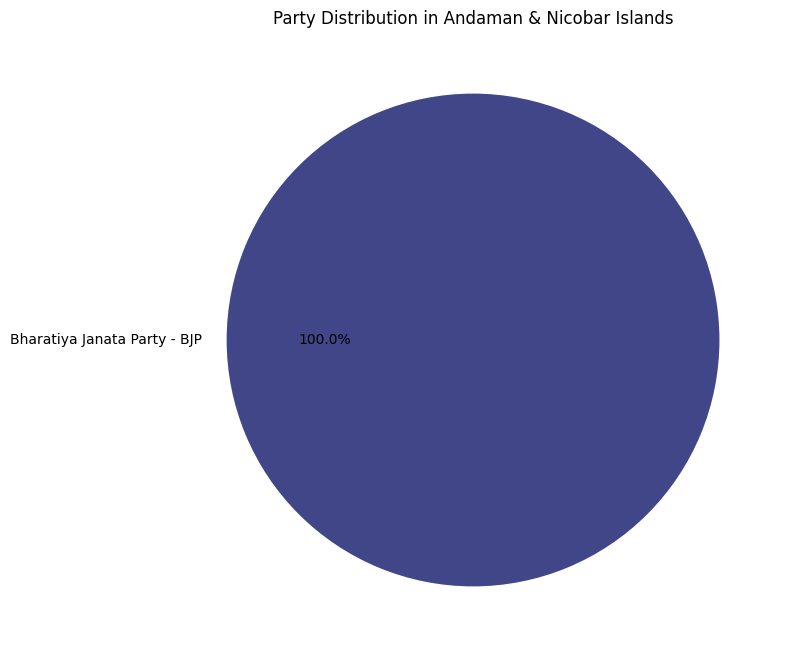

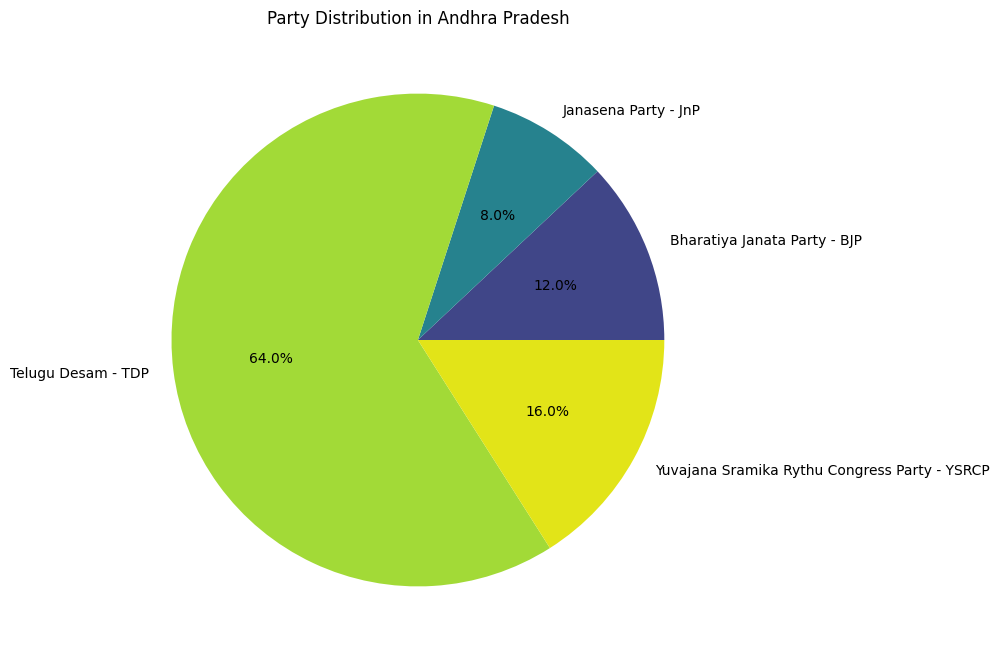

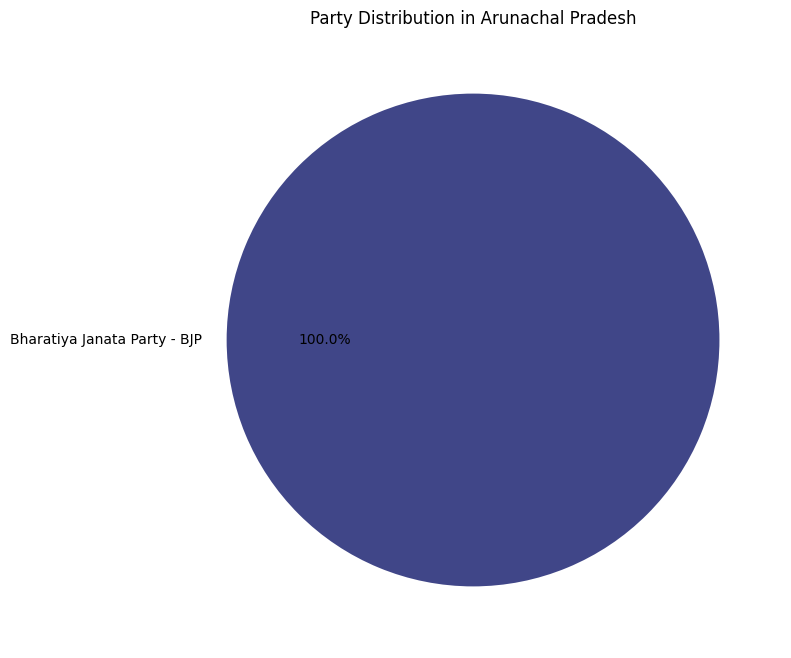

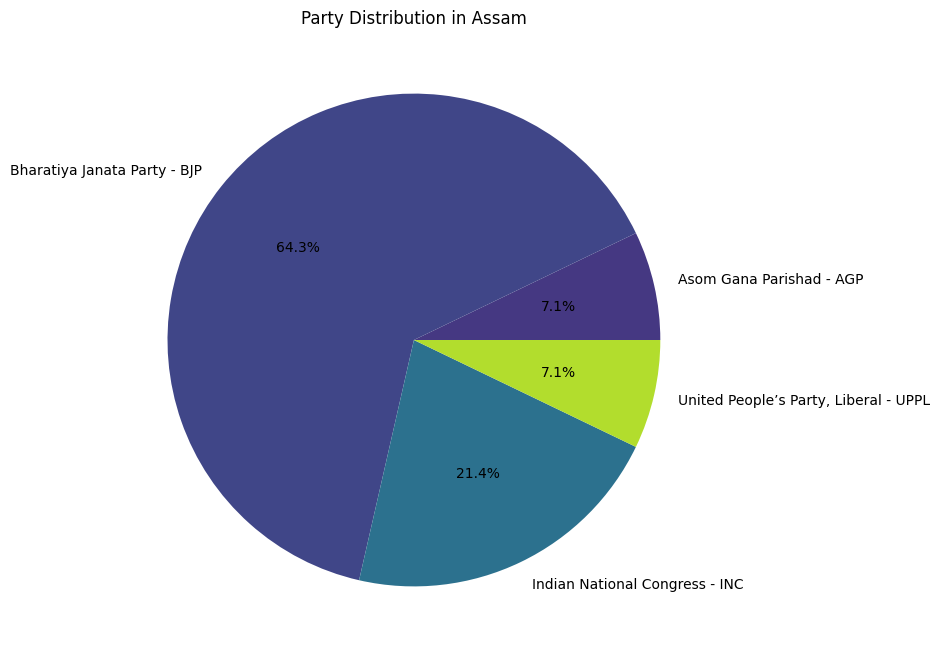

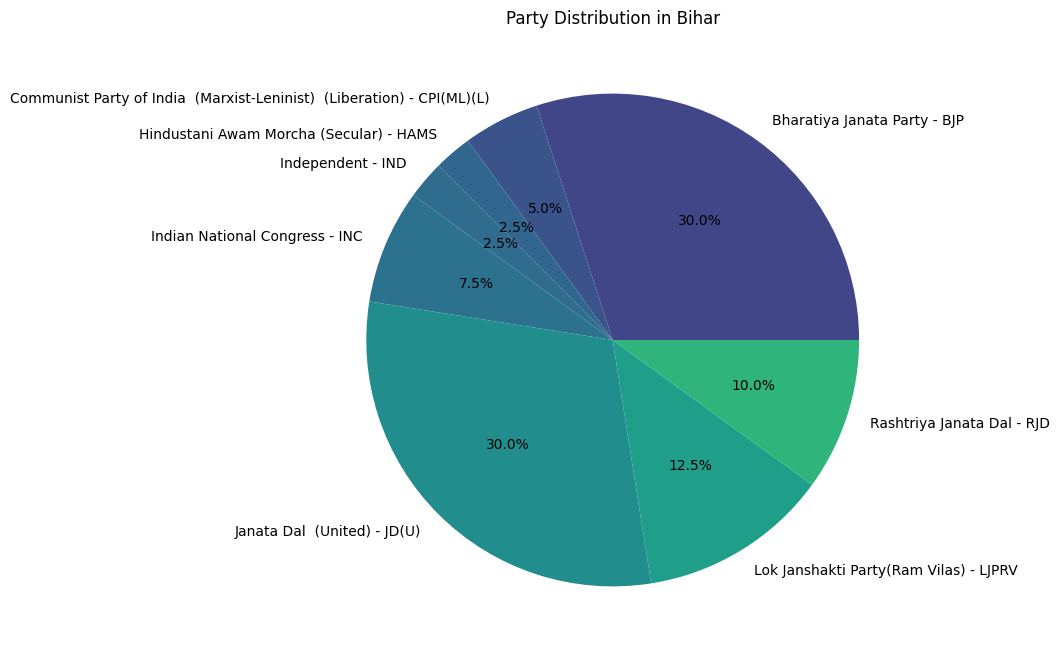

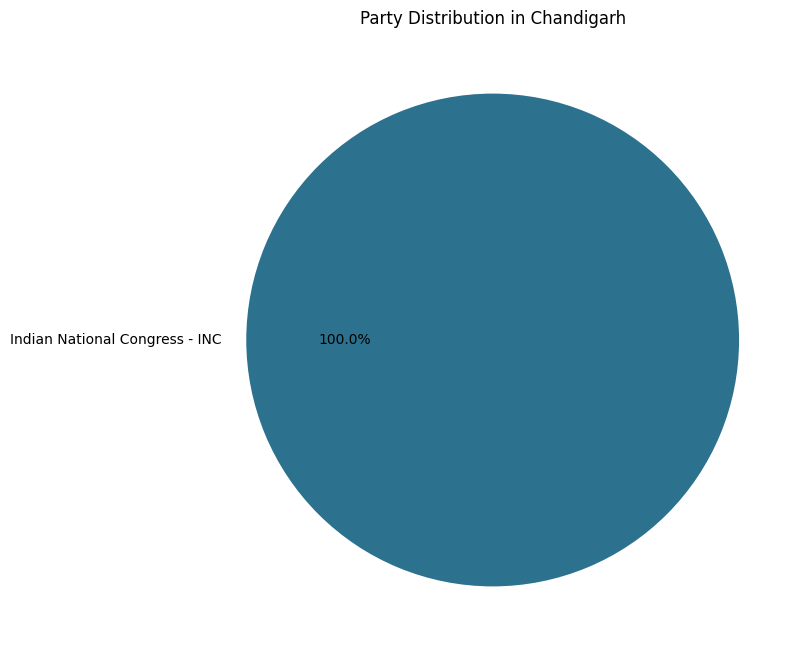

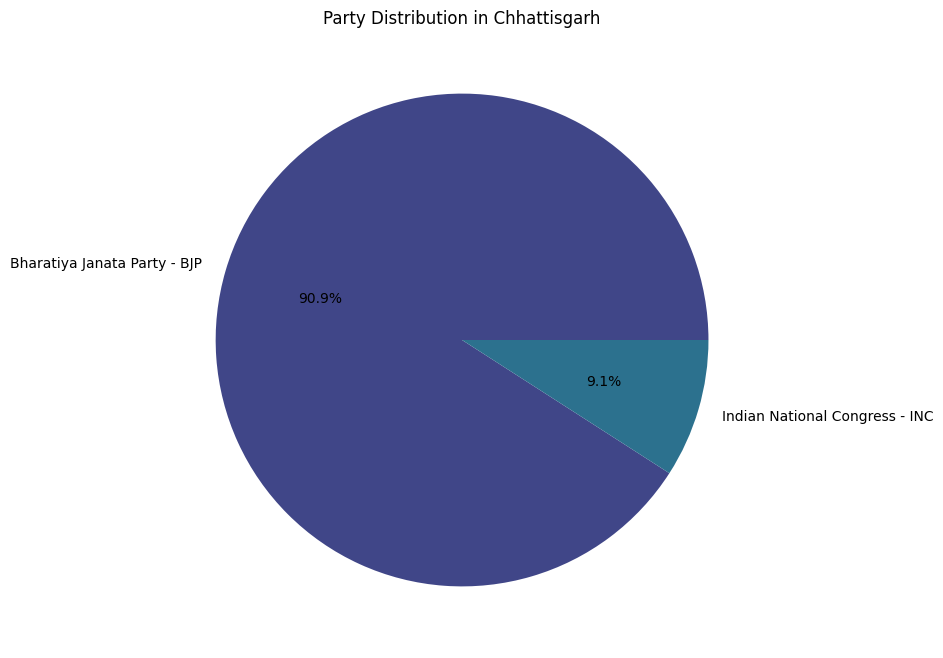

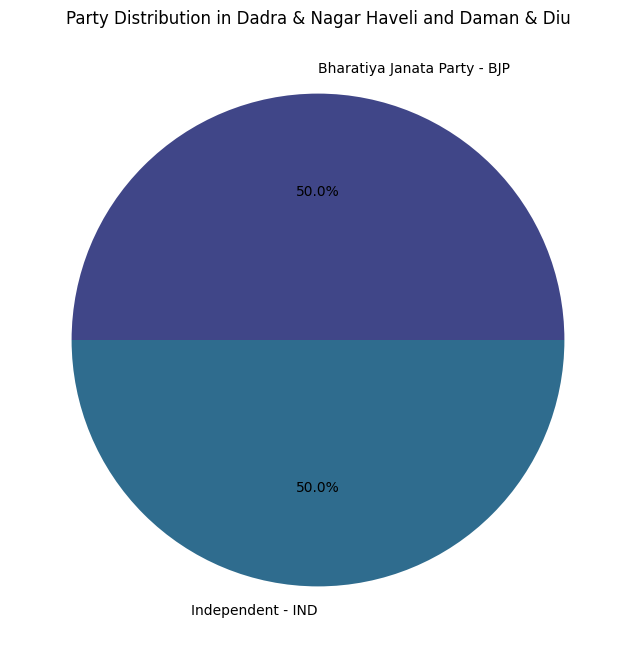

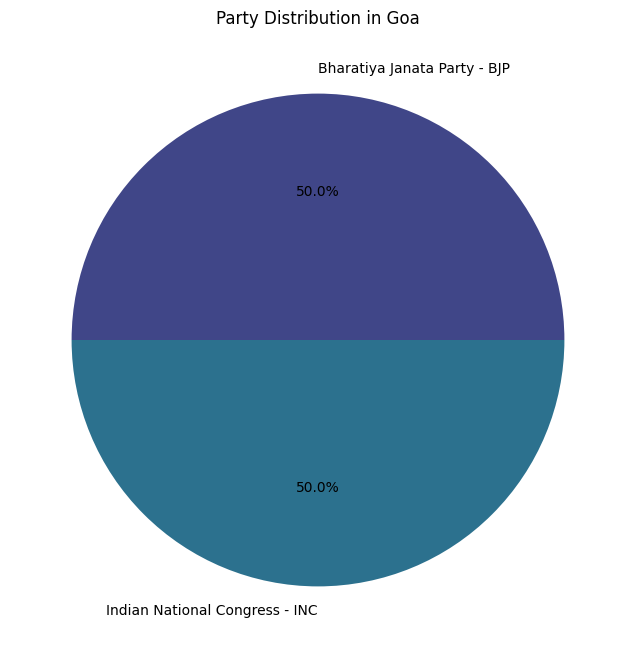

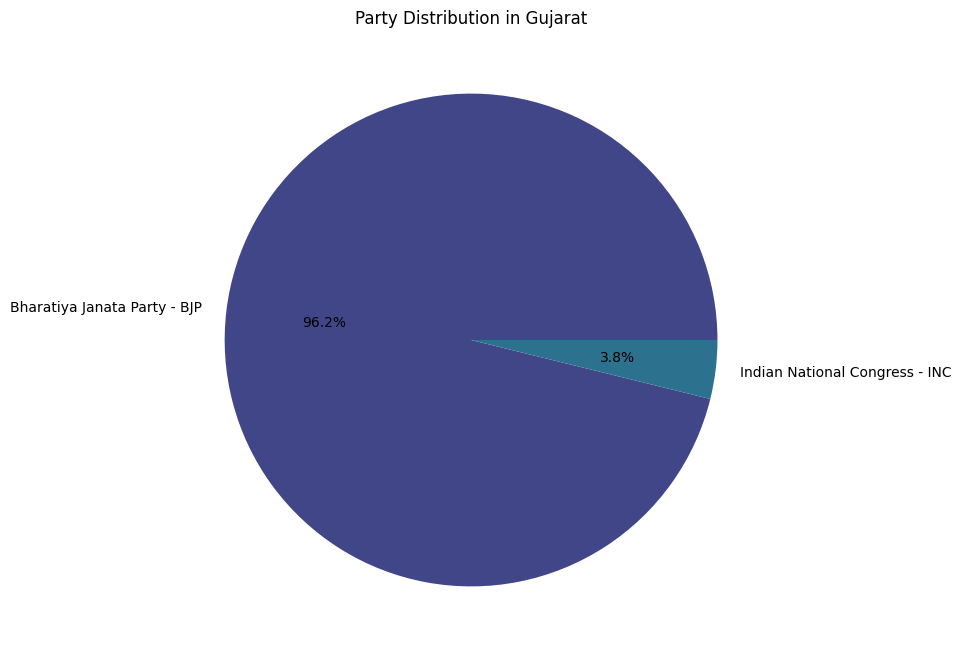

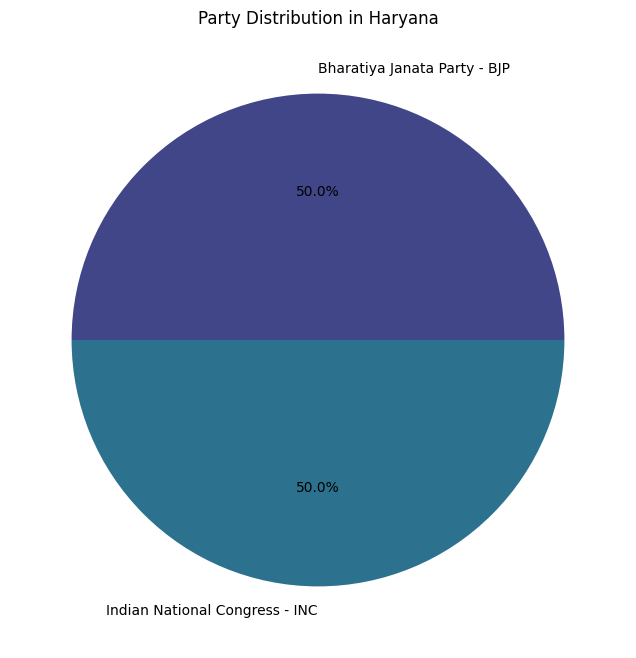

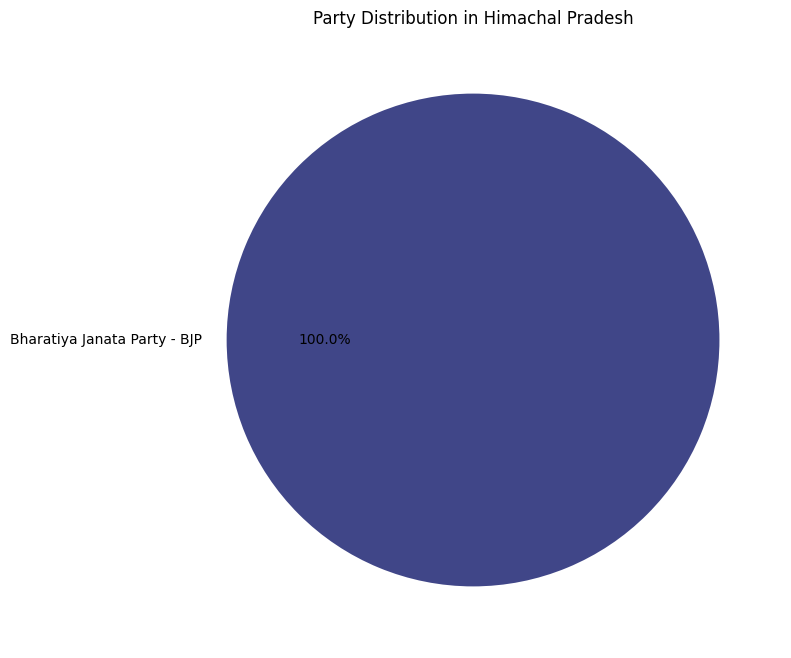

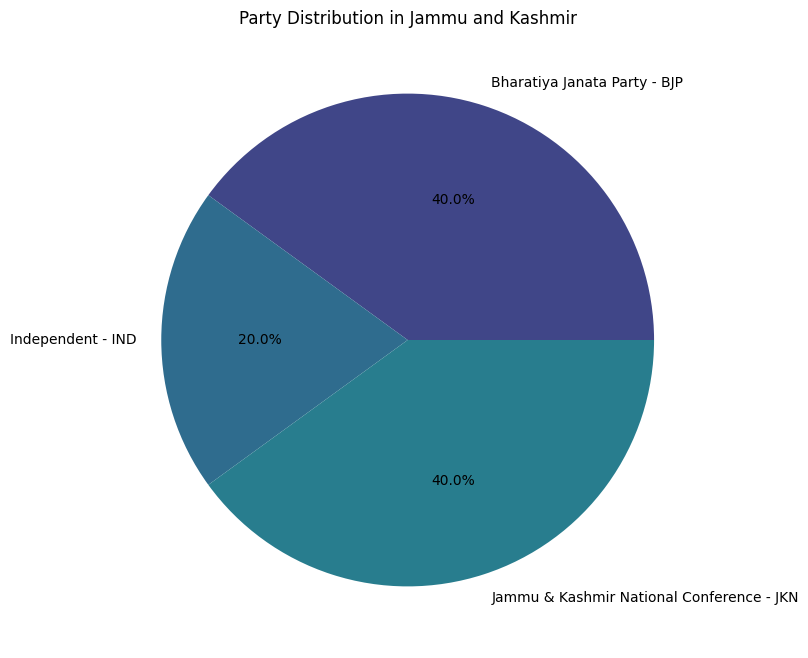

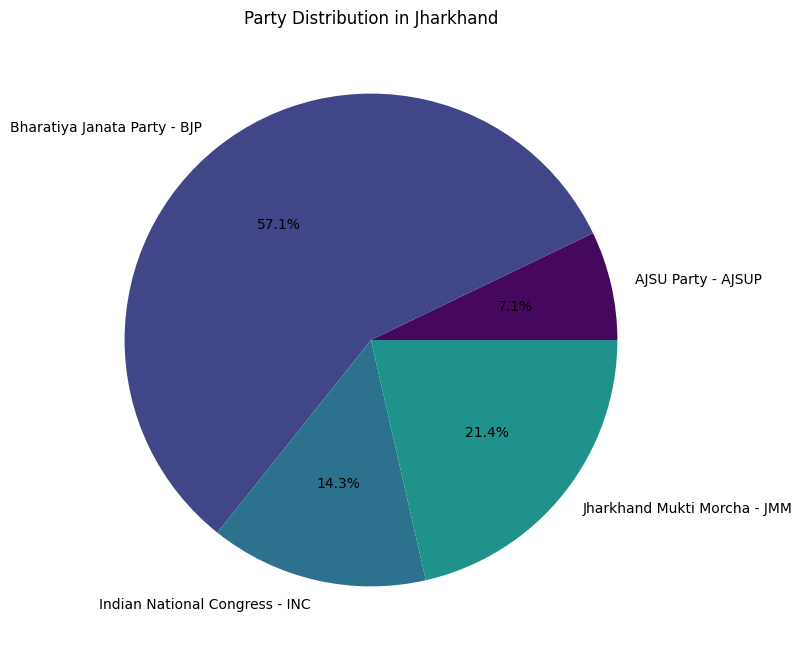

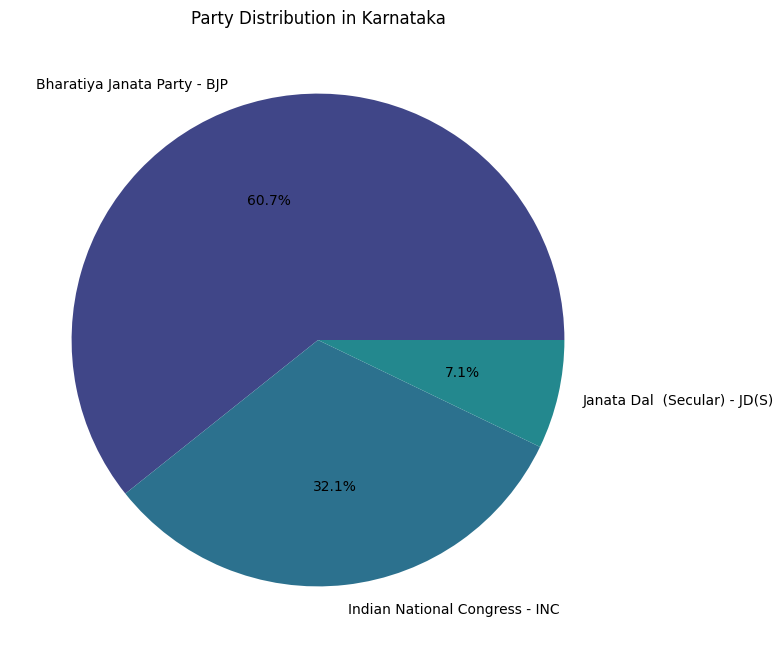

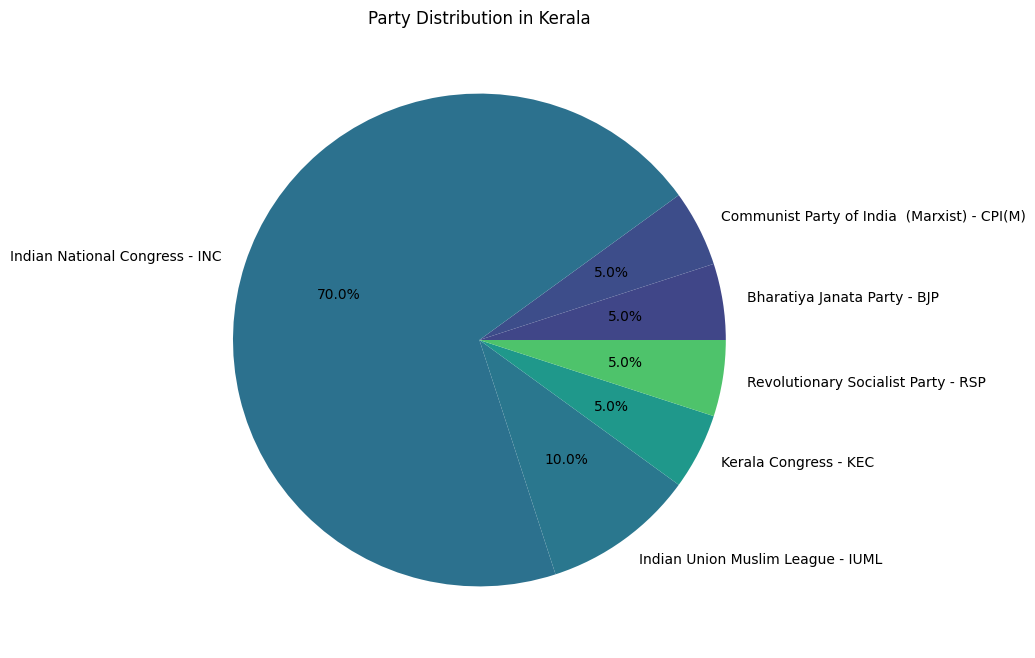

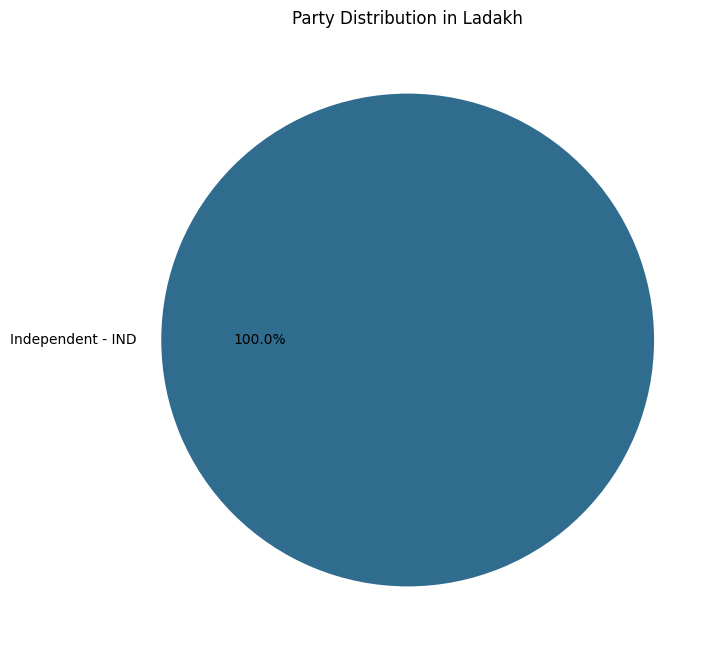

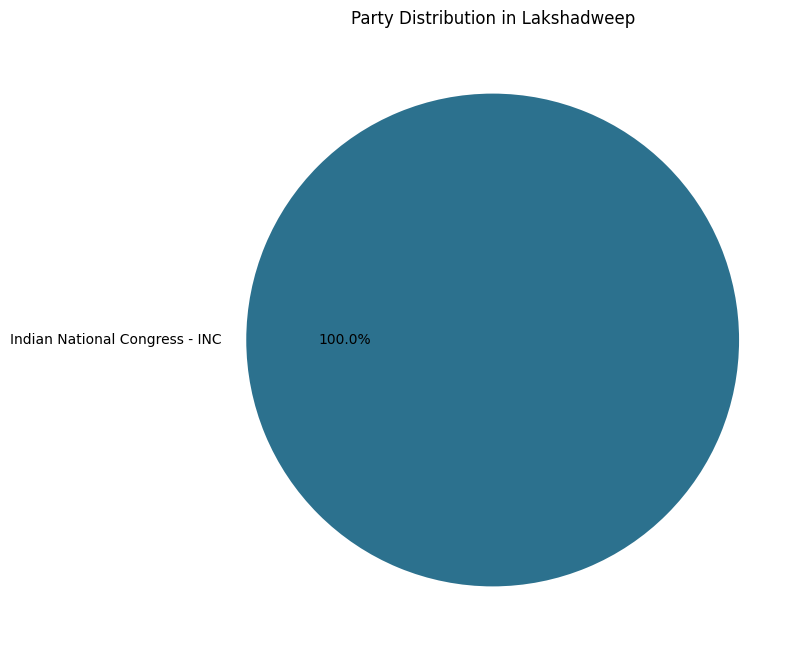

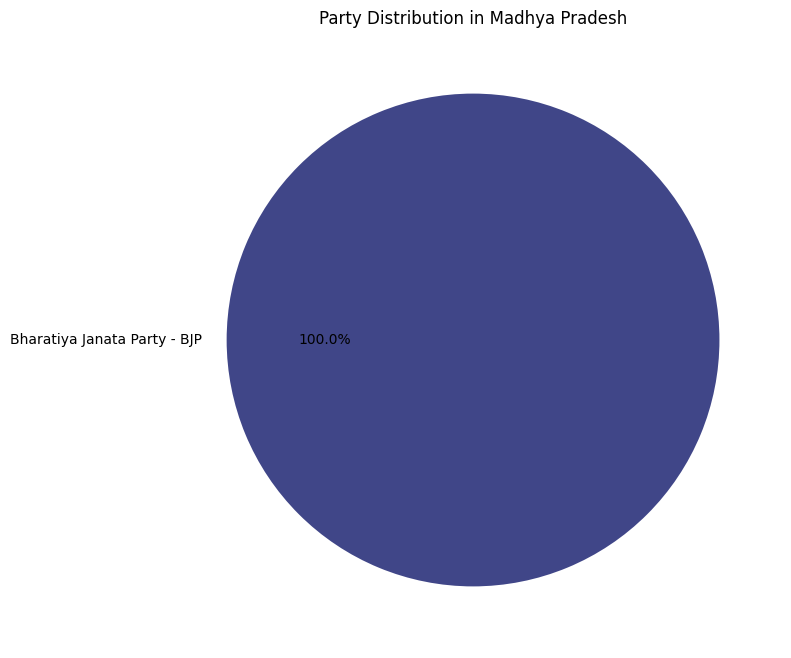

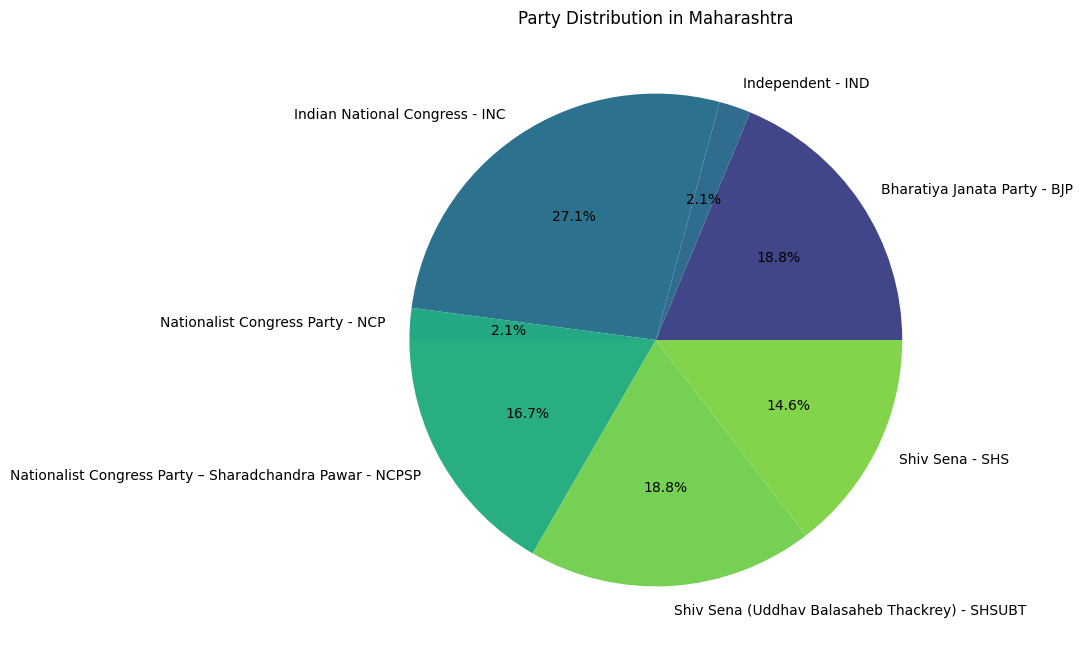

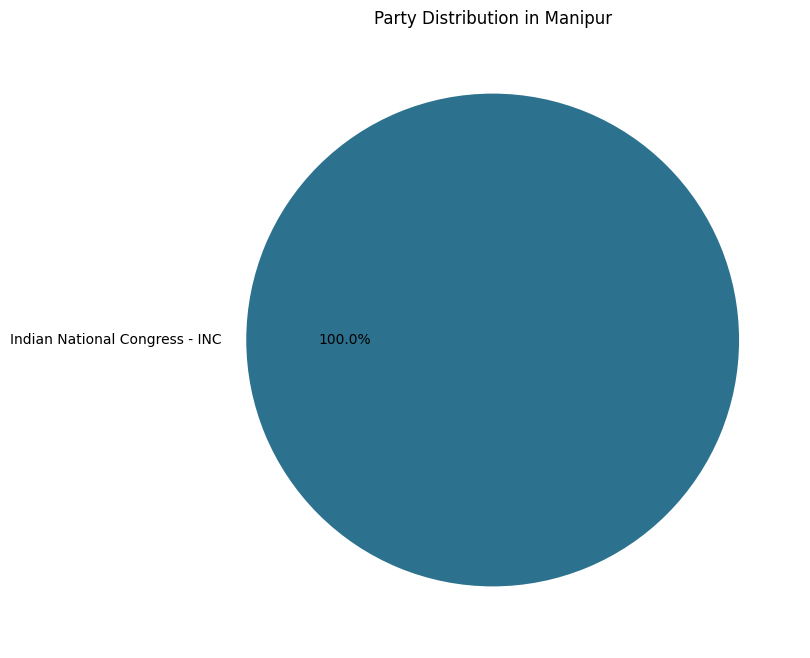

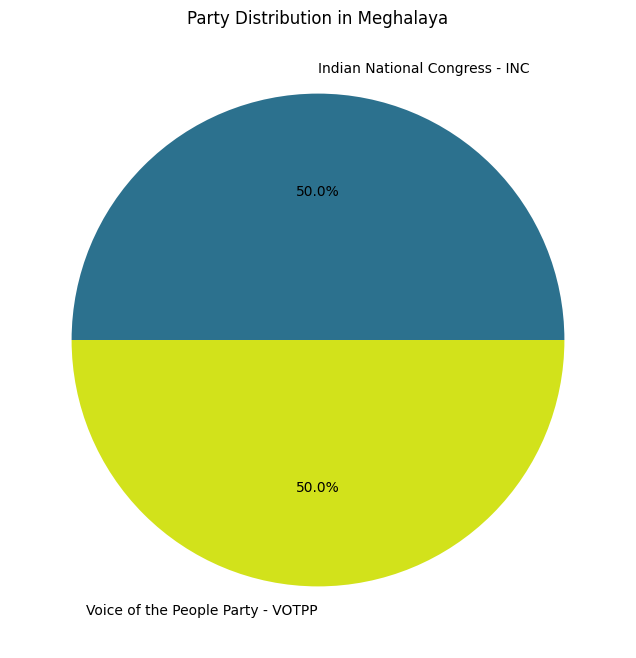

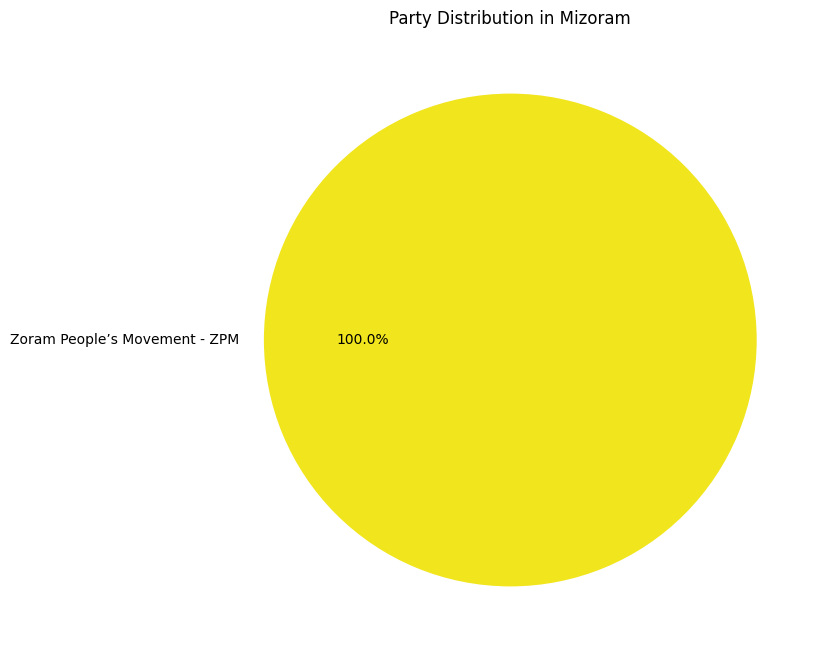

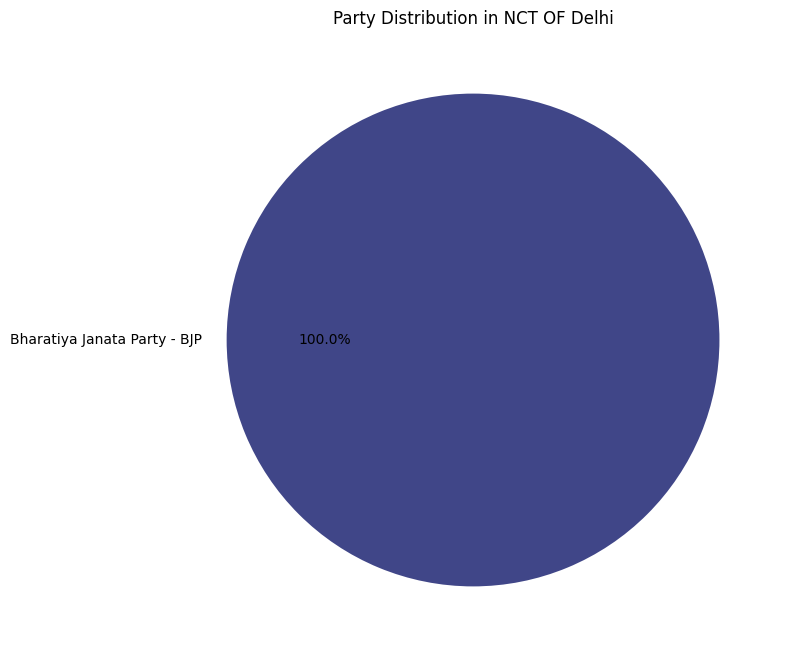

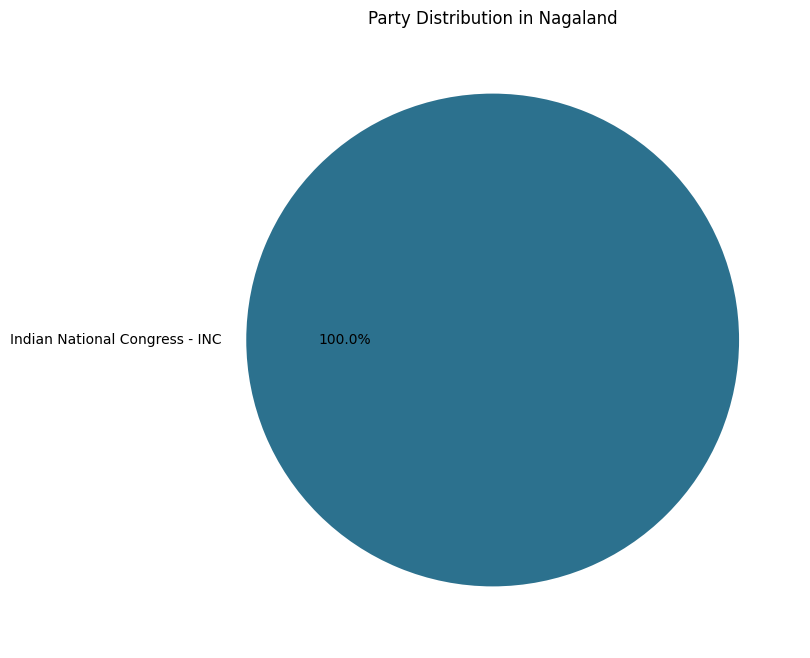

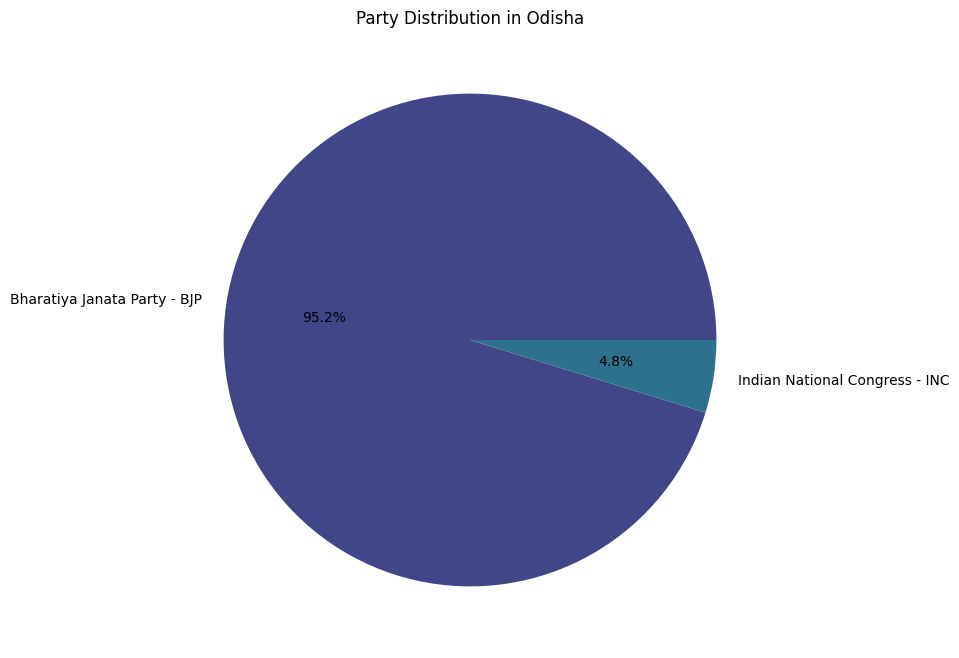

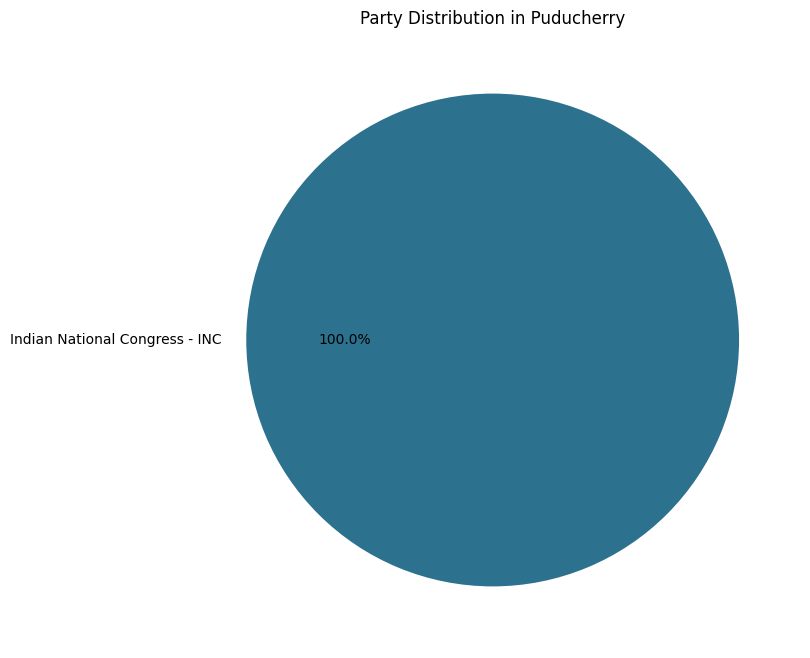

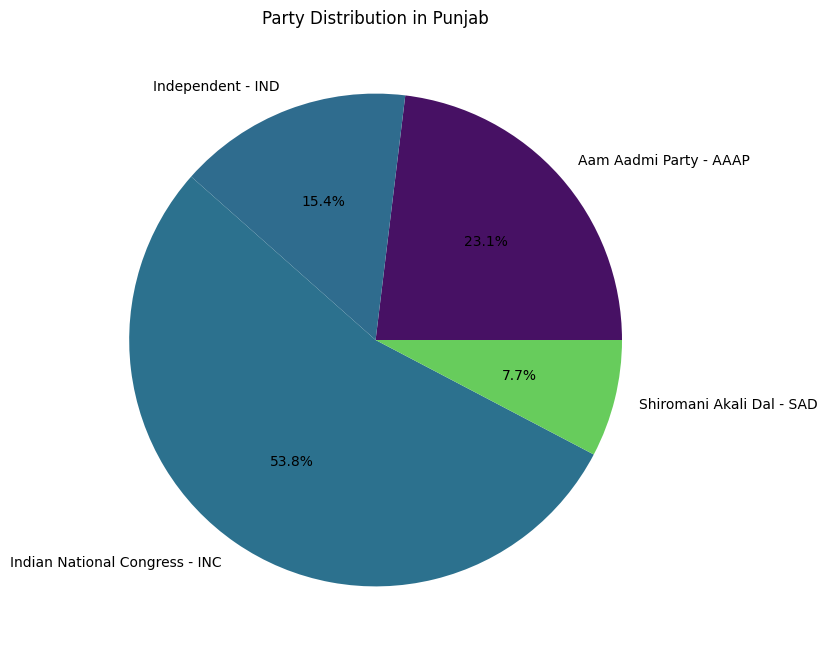

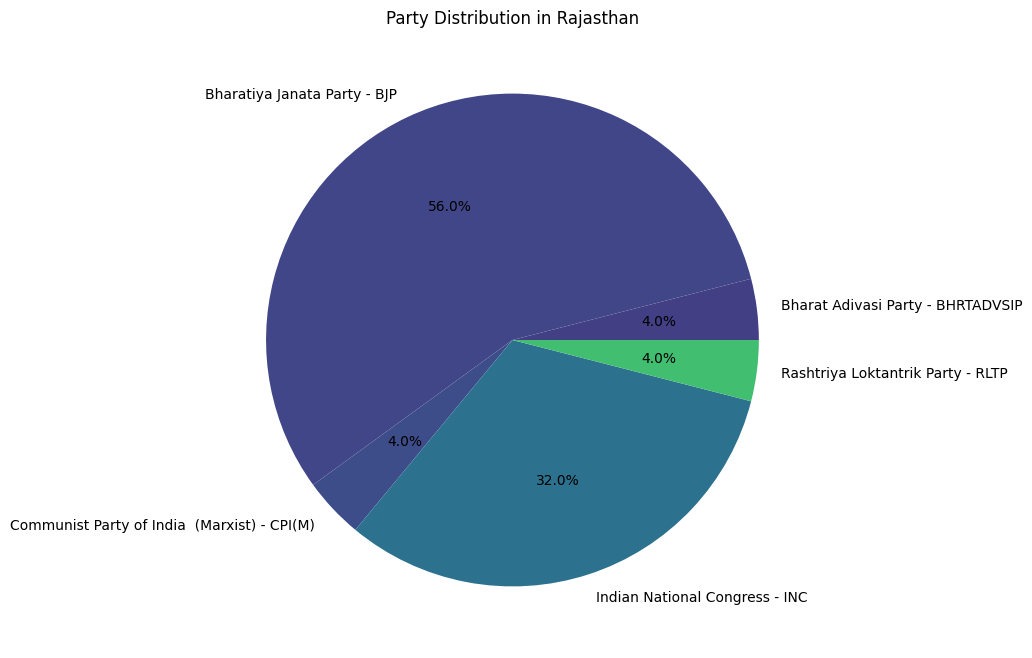

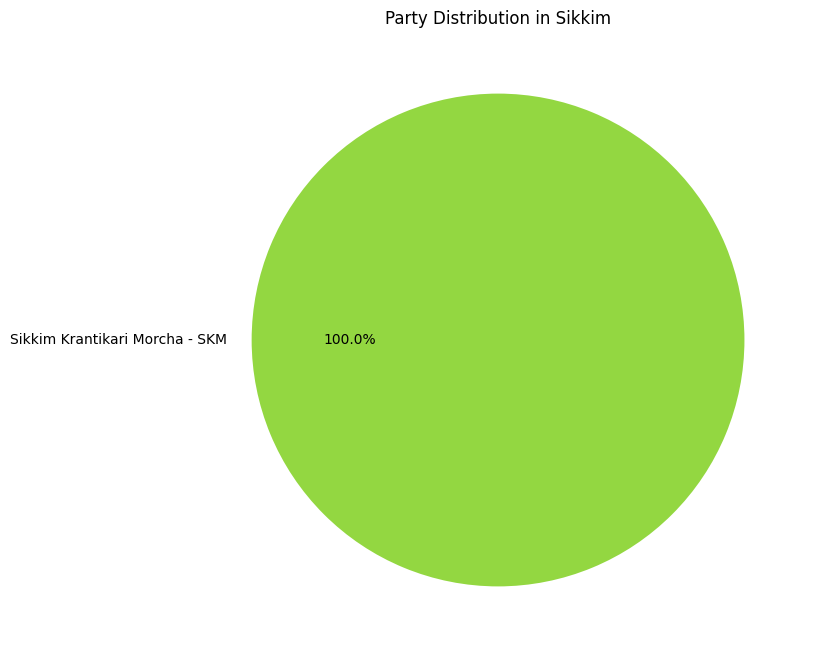

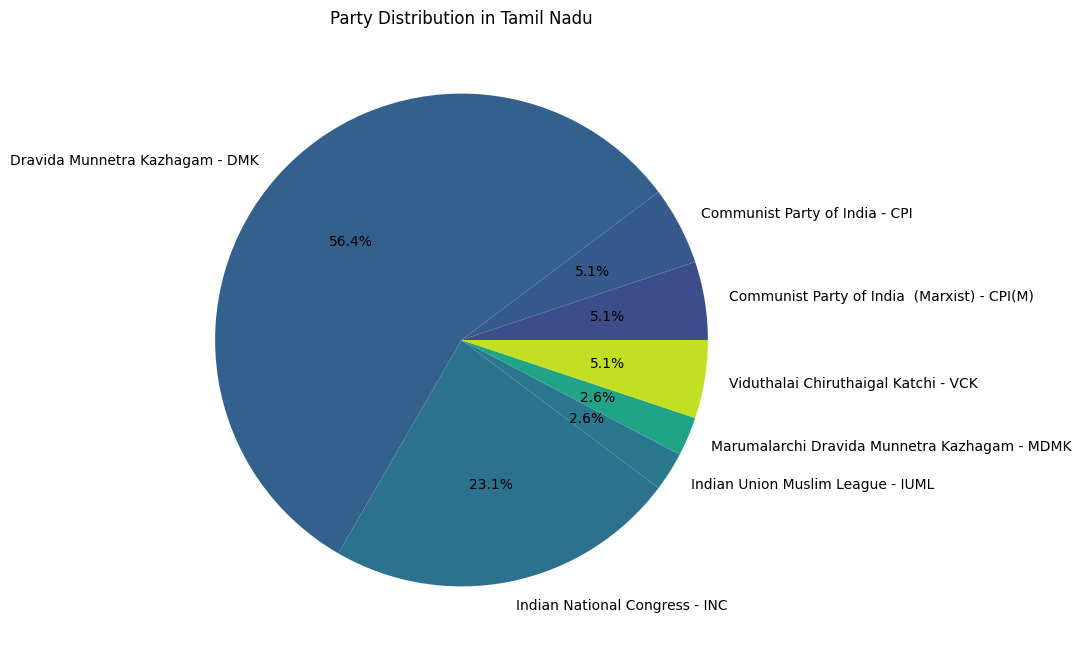

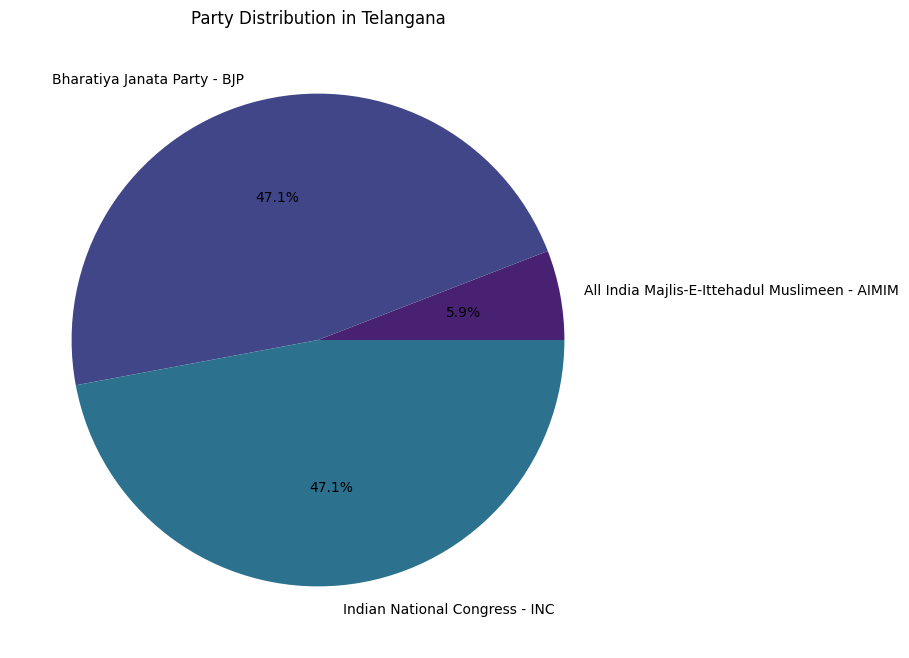

In [ ]:
# Grouping by state and party
state_seats = df.pivot_table(values='Won', index='State', columns='Party', fill_value=0)

# Plotting party distribution for each state
colors = sns.color_palette('viridis', len(state_seats.columns))
for state in state_seats.index:
    state_seats.loc[state].plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p > 0 else '', colors=colors, figsize=(8, 8))
    plt.title(f'Party Distribution in {state}')
    plt.ylabel('')
    plt.show()


In [18]:
# Determine the number of states won by each party
state_seats = df.pivot_table(values='Won', index='State', columns='Party', fill_value=0)
majority_winners = state_seats.idxmax(axis=1)

# Count the number of states won by Congress (INC) and BJP
congress_wins = majority_winners[majority_winners == 'Indian National Congress - INC'].count()
bjp_wins = majority_winners[majority_winners == 'Bharatiya Janata Party - BJP'].count()

print(f"States won by Congress (INC): {congress_wins}")
print(f"States won by BJP: {bjp_wins}")

States won by Congress (INC): 9
States won by BJP: 20


ARUNACHAL PRADESH


In [ ]:

import requests
from bs4 import BeautifulSoup

url = "https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table_html = soup.find('table')

print(table_html.prettify())

<table class="table table-striped table-bordered">
 <thead>
  <tr>
   <th colspan="9">
    Status Known For 60 out of 60 Constituencies
   </th>
  </tr>
  <tr>
   <th style="text-align:left">
    Constituency
   </th>
   <th style="text-align:left">
    Const. No.
   </th>
   <th style="text-align:left">
    Leading Candidate
   </th>
   <th style="text-align:left">
    Leading Party
   </th>
   <th style="text-align:left">
    Trailing Candidate
   </th>
   <th style="text-align:left">
    Trailing Party
   </th>
   <th style="text-align:left">
    Margin
   </th>
   <th style="text-align:left">
    Round
   </th>
   <th style="text-align:left">
    Status
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td align="left">
    Along (East)
   </td>
   <td align="right">
    31
   </td>
   <td align="left">
    KENTO JINI
   </td>
   <td align="left">
    <table>
     <tbody>
      <tr>
       <td align="left">
        Bharatiya Janata Party
       </td>
       <td>
        <span class="to

In [ ]:
table_html = soup.find('table', attrs={'class': 'table table-striped'})

print(table_html.prettify())

<table class="table table-striped">
 <tbody>
  <tr>
   <td>
    Leading In
   </td>
   <td>
    :
   </td>
   <td>
    0
   </td>
  </tr>
  <tr>
   <td>
    Won In
   </td>
   <td>
    :
   </td>
   <td>
    46
   </td>
  </tr>
  <tr>
   <td>
    Trailing In
   </td>
   <td>
    :
   </td>
   <td>
    0
   </td>
  </tr>
 </tbody>
</table>



In [ ]:
import pandas as pd
df = pd.read_html(str(table_html))[0]

# Remove the unwanted row
df.drop(df.index[0], inplace=True)

print(df)

             0  1   2
1       Won In  :  46
2  Trailing In  :   0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

main_table = soup.find('table', attrs={'class': 'table table-striped table-bordered'})

# Remove the nested table
for nested_table in main_table.find_all('table', recursive=False):
    if nested_table!= main_table:
        nested_table.decompose()

# Extract the data from the main table
headers = [th.text.strip() for th in main_table.find('tr').find_all('th')]
data = []
for row in main_table.find_all('tr')[1:]:  # skip the header row
    cols = []
    for col in row.find_all('td'):
        cols.append(' '.join([text.strip() for text in col.find_all(text=True) if not text.parent.name == 'table']))
    data.append(cols)

df = pd.DataFrame(data, columns=headers)
print(df)

<ipython-input-22-510ad25c1144>:22: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cols.append(' '.join([text.strip() for text in col.find_all(text=True) if not text.parent.name == 'table']))


ValueError: 1 columns passed, passed data had 31 columns

In [11]:
import csv
import requests
from bs4 import BeautifulSoup

# List of URLs containing the tables
urls = [
    'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm',
    'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS022.htm',
    'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS023.htm'
]

def extract_table_data(table):
    headers = []
    for header_row in table.find_all('tr'):
        if header_row.find('th'):
            headers = [header.text.strip() for header in header_row.find_all('th')]
            if "Status Known For 60 out of 60 Constituencies" in headers:
                headers = []  # Reset headers if it's the status header
            else:
                break

    filter_column_index = None
    for index, header in enumerate(headers):
        if header == "Status":
            filter_column_index = index
            break

    if filter_column_index is None:
        return headers, []

    rows = []
    for row in table.find_all('tr'):
        cells = [cell.text.strip() for cell in row.find_all('td')]

        if len(cells) > filter_column_index and cells[filter_column_index] == "Status Known":
            continue

        if cells:
            rows.append(cells)

    return headers, rows

def process_html_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    main_table = soup.find('table', class_='table table-striped table-bordered')

    if main_table:
        nested_table = main_table.find('table', class_='table table-striped')
        if nested_table:
            nested_table.decompose()

        main_headers, main_rows = extract_table_data(main_table)
    else:
        main_headers, main_rows = [], []

    return main_headers, main_rows

all_main_rows = []
main_headers = None

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        page_main_headers, page_main_rows = process_html_content(response.text)

        if main_headers is None:
            main_headers = page_main_headers

        all_main_rows.extend(page_main_rows)
    else:
        print(f"Failed to fetch {url}")

if main_headers:
    print("Main Table Headers:")
    print(" | ".join(main_headers))
    print("-" * 100)
    for row in all_main_rows:
        print(" | ".join(row))
else:
    print("No main headers found.")

main_csv_filename = 'ArunP.csv'

with open(main_csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(main_headers)
    for row in all_main_rows:
        csvwriter.writerow(row)

print(f"CSV file '{main_csv_filename}' has been created successfully.")




Main Table Headers:
Constituency | Const. No. | Leading Candidate | Leading Party | Trailing Candidate | Trailing Party | Margin | Round | Status
----------------------------------------------------------------------------------------------------
Along (East) | 31 | KENTO JINI | Bharatiya Janata PartyiParty Wise State Trends | Bharatiya Janata Party | iParty Wise State Trends | JARKAR GAMLIN | People's Party of Arunachal
iParty Wise State TrendsLeading In:0Won In:2Trailing In:0 | People's Party of Arunachal | iParty Wise State TrendsLeading In:0Won In:2Trailing In:0 | Leading In | : | 0 | Won In | : | 2 | Trailing In | : | 0 | 3158 | 4/4 | Result Declared
Bharatiya Janata Party | iParty Wise State Trends
People's Party of Arunachal | iParty Wise State TrendsLeading In:0Won In:2Trailing In:0 | Leading In | : | 0 | Won In | : | 2 | Trailing In | : | 0
Leading In | : | 0
Won In | : | 2
Trailing In | : | 0
Along (West) | 30 | TOPIN ETE | Bharatiya Janata PartyiParty Wise State TrendsLeadin

In [13]:
import requests

url = 'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS021.htm'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print or save the HTML content
    html_content = response.text
    print(html_content)  # Print the HTML content
    # Optionally, you can save it to a file
    with open('statewiseS021.html', 'w', encoding='utf-8') as f:
        f.write(html_content)
else:
    print(f"Failed to fetch HTML content from {url}. Status code: {response.status_code}")

<!doctype html>
<html lang='en'>

<head>
  <!-- Required meta tags -->
  <meta charset='utf-8'>
  <meta name='viewport' content='width=device-width, initial-scale=1'>
  <meta http-equiv='Content-Type' content='text/html; charset=UTF-8'>
    <meta http-equiv='X-UA-Compatible' content='IE=7'>
    <meta http-equiv='Cache-Control' content='no-cache, no-store, must-revalidate'>
    <meta http-equiv='Pragma' content='no-cache'>
    <meta http-equiv='Expires' content='0'>
    <meta http-equiv='refresh' content='300'>
  <!-- Bootstrap CSS -->
  <link href='css/bootstrap.min.css' rel='stylesheet'>
  <link href='css/custom.css' rel='stylesheet'>
  <link href='css/responsive.css' rel='stylesheet'> 
  <link href='css/font.css' rel='stylesheet'>
  <link rel='shortcut icon' href='img/icons/favicon.ico' type='image/x-icon'>
  <title>Election Commission of India</title>
      <style>
      /*start update style for tool tip*/ 
         .custom-cell-style {
            padding-right: 16px;
            d

In [17]:
null_counts = df.isnull().sum()

# Display columns with missing values
print("\nColumns with missing values:")
print(null_counts[null_counts > 0])


Columns with missing values:
Series([], dtype: int64)


In [ ]:
from google.colab import files
from google.colab import drive
files.download('ArunP.csv')
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


ANDRA Pradesh

In [ ]:


# Function to generate URLs based on a pattern
def generate_urls(base_url, start_index, end_index):
    urls = []
    for i in range(start_index, end_index + 1):
        url = f"{base_url}{i:03}.htm"  # Example pattern: https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS011.htm
        urls.append(url)
    return urls

# Base URL and number of URLs to generate
base_url = 'https://results.eci.gov.in/AcResultGenJune2024/statewiseS'
start_index=11
end_index = 19  # Generate URLs from statewiseS001.htm to statewiseS003.htm

# Generate URLs
urls = generate_urls(base_url, start_index, end_index)
def extract_table_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')

    # Extract the table headers
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract the table rows
    rows = []
    for row in table.find_all('tr'):
        cells = [cell.text.strip() for cell in row.find_all('td')]
        if cells:
            rows.append(cells)

    return headers, rows

# Initialize a list to hold all rows from all tables
all_rows = []
headers = None

for url in urls:
    # Fetch the HTML content from the URL
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the table data
        page_headers, page_rows = extract_table_data(response.text)
        if headers is None:
            headers = page_headers
        all_rows.extend(page_rows)
    else:
        print(f"Failed to fetch {url}")

# Print the table data
if headers:
    print(" | ".join(headers))
    print("-" * 100)
    for row in all_rows:
        print(" | ".join(row))
else:
    print("No headers found.")


Status Known For 175 out of 175 Constituencies | Constituency | Const. No. | Leading Candidate | Leading Party | Trailing Candidate | Trailing Party | Margin | Round | Status | 
----------------------------------------------------------------------------------------------------
Achanta | 56 | SATYANARAYANA PITHANI | Telugu DesamiParty Wise State TrendsLeading In:0Won In:135Trailing In:0 | Telugu Desam | iParty Wise State TrendsLeading In:0Won In:135Trailing In:0 | Leading In | : | 0 | Won In | : | 135 | Trailing In | : | 0 | CHERUKUVADA SRI RANGANADHA RAJU | Yuvajana Sramika Rythu Congress Party
iParty Wise State TrendsLeading In:0Won In:11Trailing In:0 | Yuvajana Sramika Rythu Congress Party | iParty Wise State TrendsLeading In:0Won In:11Trailing In:0 | Leading In | : | 0 | Won In | : | 11 | Trailing In | : | 0 | 26554 | 14/14 | Result Declared
Telugu Desam | iParty Wise State TrendsLeading In:0Won In:135Trailing In:0 | Leading In | : | 0 | Won In | : | 135 | Trailing In | : | 0
Leadi

ODDISHA

In [ ]:


# Function to generate URLs based on a pattern
def generate_urls(base_url, start_index, end_index):
    urls = []
    for i in range(start_index, end_index + 1):
        url = f"{base_url}{i:03}.htm"  # Example pattern: https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS011.htm
        urls.append(url)
    return urls

# Base URL and number of URLs to generate
base_url = 'https://results.eci.gov.in/AcResultGenJune2024/statewiseS'
start_index=181
end_index = 188  # Generate URLs from statewiseS001.htm to statewiseS003.htm

# Generate URLs
urls = generate_urls(base_url, start_index, end_index)
def extract_table_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')

    # Extract the table headers
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract the table rows
    rows = []
    for row in table.find_all('tr'):
        cells = [cell.text.strip() for cell in row.find_all('td')]
        if cells:
            rows.append(cells)

    return headers, rows

# Initialize a list to hold all rows from all tables
all_rows = []
headers = None

for url in urls:
    # Fetch the HTML content from the URL
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the table data
        page_headers, page_rows = extract_table_data(response.text)
        if headers is None:
            headers = page_headers
        all_rows.extend(page_rows)
    else:
        print(f"Failed to fetch {url}")

# Print the table data
if headers:
    print(" | ".join(headers))
    print("-" * 100)
    for row in all_rows:
        print(" | ".join(row))
else:
    print("No headers found.")

Status Known For 147 out of 147 Constituencies | Constituency | Const. No. | Leading Candidate | Leading Party | Trailing Candidate | Trailing Party | Margin | Round | Status | 
----------------------------------------------------------------------------------------------------
Anandapur | 22 | ABHIMANYU SETHI | Biju Janata DaliParty Wise State TrendsLeading In:0Won In:51Trailing In:0 | Biju Janata Dal | iParty Wise State TrendsLeading In:0Won In:51Trailing In:0 | Leading In | : | 0 | Won In | : | 51 | Trailing In | : | 0 | JAYADEV JENA | Indian National Congress
iParty Wise State TrendsLeading In:0Won In:14Trailing In:0 | Indian National Congress | iParty Wise State TrendsLeading In:0Won In:14Trailing In:0 | Leading In | : | 0 | Won In | : | 14 | Trailing In | : | 0 | 10966 | 25/25 | Result Declared
Biju Janata Dal | iParty Wise State TrendsLeading In:0Won In:51Trailing In:0 | Leading In | : | 0 | Won In | : | 51 | Trailing In | : | 0
Leading In | : | 0
Won In | : | 51
Trailing In | :

SHIKKIM

In [ ]:


# List of URLs containing the tables
urls = [
    'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS211.htm',
    'https://results.eci.gov.in/AcResultGen2ndJune2024/statewiseS212.htm'
]

def extract_table_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')

    # Extract the table headers
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract the table rows
    rows = []
    for row in table.find_all('tr'):
        cells = [cell.text.strip() for cell in row.find_all('td')]
        if cells:
            rows.append(cells)

    return headers, rows

# Initialize a list to hold all rows from all tables
all_rows = []
headers = None

for url in urls:
    # Fetch the HTML content from the URL
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the table data
        page_headers, page_rows = extract_table_data(response.text)
        if headers is None:
            headers = page_headers
        all_rows.extend(page_rows)
    else:
        print(f"Failed to fetch {url}")

# Print the table data
if headers:
    print(" | ".join(headers))
    print("-" * 100)
    for row in all_rows:
        print(" | ".join(row))
else:
    print("No headers found.")

Status Known For 32 out of 32 Constituencies | Constituency | Const. No. | Leading Candidate | Leading Party | Trailing Candidate | Trailing Party | Margin | Round | Status | 
----------------------------------------------------------------------------------------------------
ARITHANG | 26 | ARUN KUMAR UPRETI | Sikkim Krantikari MorchaiParty Wise State TrendsLeading In:0Won In:31Trailing In:0 | Sikkim Krantikari Morcha | iParty Wise State TrendsLeading In:0Won In:31Trailing In:0 | Leading In | : | 0 | Won In | : | 31 | Trailing In | : | 0 | ASHIS RAI | Sikkim Democratic Front
iParty Wise State TrendsLeading In:0Won In:1Trailing In:0 | Sikkim Democratic Front | iParty Wise State TrendsLeading In:0Won In:1Trailing In:0 | Leading In | : | 0 | Won In | : | 1 | Trailing In | : | 0 | 2729 | 3/3 | Result Declared
Sikkim Krantikari Morcha | iParty Wise State TrendsLeading In:0Won In:31Trailing In:0 | Leading In | : | 0 | Won In | : | 31 | Trailing In | : | 0
Leading In | : | 0
Won In | : | 31
